In [1]:
from sklearn.datasets import fetch_20newsgroups
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib as mpl
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('stopwords')
stop_words=stopwords.words('english')
stop_words=stop_words+list(string.printable)
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohan.chopra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rohan.chopra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
categories= ['sci.space', 'sci.electronics', 'sci.med']

In [4]:
news_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, download_if_missing=True)

In [5]:
news_data['data'][:5]

['From: landis@stsci.edu (Robert Landis,S202,,)\nSubject: Re: Space Debris\nReply-To: landis@stsci.edu\nOrganization: Space Telescope Science Institute, Baltimore MD\nLines: 14\n\nAnother fish to check out is Richard Rast -- he works\nfor Lockheed Missiles, but is on-site at NASA Johnson.\n\nNick Johnson at Kaman Sciences in Colo. Spgs and his\nfriend, Darren McKnight at Kaman in Alexandria, VA.\n\nGood luck.\n\nR. Landis\n\n"Behind every general is his wife.... and...\n behind every Hillary is a Bill . ."\n\n\n',
 "From: markz@ssc.com (Mark Zenier)\nSubject: Re: Can I use a CD4052 analog multiplexer for digital signals?\nOrganization: SSC, Inc.,  Seattle, WA\nX-Newsreader: TIN [version 1.1 PL6]\nLines: 13\n\nTall Cool One (rky57514@uxa.cso.uiuc.edu) wrote:\n: As the subject says - Can I use a 4052 for digital signals?  I don't see\n: why it couldn't handle digital signals, but I could be wrong.  Anyone have\n: any advice?  Thanks.\n\nThe switches have a non-negligable on resistance (u

In [6]:
news_data.target

array([2, 0, 1, ..., 1, 1, 1], dtype=int64)

In [7]:
news_data_df = pd.DataFrame({'text' : news_data['data'], 'category': news_data.target})
news_data_df.head()

,text,category
0,"From: landis@stsci.edu (Robert Landis,S202,,)\...",2
1,From: markz@ssc.com (Mark Zenier)\nSubject: Re...,0
2,From: bj368@cleveland.Freenet.Edu (Mike E. Rom...,1
3,From: sasghm@theseus.unx.sas.com (Gary Merrill...,1
4,From: Leigh Palmer <palmer@sfu.ca>\nSubject: R...,2


In [8]:
news_data_df['category'].value_counts()

1    594
2    593
0    591
Name: category, dtype: int64

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rohan.chopra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
news_data_df['cleaned_text'] = news_data_df['text'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
    for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x))) if word.lower() not in stop_words]))

In [11]:
tfidf_model = TfidfVectorizer(max_features=200)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(news_data_df['cleaned_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,10,12,14,15,1993,20,30,ac,access,actually,...,way,week,well,wire,without,work,world,would,writes,year
0,0.000000,0.0,0.269858,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.196925,0.0,0.000000,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.180342,0.0,0.000000,0.000000,0.000000
2,0.087618,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.098047,...,0.0,0.0,0.000000,0.0,0.0,0.074932,0.0,0.056699,0.000000,0.000000
3,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.500329,0.0,0.0,0.066610,0.0,0.151207,0.042853,0.000000
4,0.000000,0.0,0.000000,0.205413,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.176738,0.0,0.0,0.000000,0.0,0.000000,0.105964,0.331138


In [12]:
dist = 1 - cosine_similarity(tfidf_df)
linkage_matrix = ward(dist)

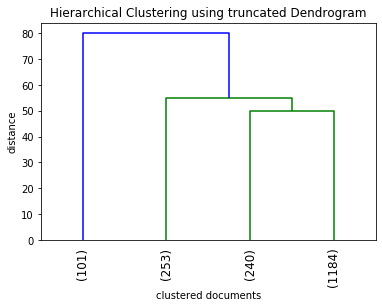

In [13]:
#Truncating the Dendrogram Truncation to show last 4 clusters
plt.title('Hierarchical Clustering using truncated Dendrogram')
plt.xlabel('clustered documents')
plt.ylabel('distance')
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # showing only last p clusters after merging
    p=4,  # p is the number of cluster that should remain after merging 
    leaf_rotation=90.,
    leaf_font_size=12.
    )
plt.show()

In [14]:
k=4
clusters = fcluster(linkage_matrix, k, criterion='maxclust')
clusters

array([2, 4, 4, ..., 3, 4, 4], dtype=int32)

In [15]:
news_data_df['obtained_clusters'] = clusters
pd.crosstab(news_data_df['category'].replace({0:'sci.space', 1:'sci.electronics', 2:'sci.med'}),\
            news_data_df['obtained_clusters'].\
            replace({1 : 'cluster_1', 2 : 'cluster_2', 3 : 'cluster_3', 4: 'cluster_4'}))

obtained_clusters,cluster_1,cluster_2,cluster_3,cluster_4
category,,,,
sci.electronics,101,10,64,419
sci.med,0,219,56,318
sci.space,0,24,120,447
